In [1]:
import vaex
import pandas as pd
import numpy as np
import time

In [2]:
n_rows = 1000000
n_cols = 1000
df = pd.DataFrame(np.random.randint(0, 100, size=(n_rows, n_cols)), columns=['col%d' % i for i in range(n_cols)])
df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col990,col991,col992,col993,col994,col995,col996,col997,col998,col999
0,68,46,75,67,17,86,95,47,71,34,...,15,84,4,28,31,84,37,72,65,69
1,75,34,14,61,18,5,42,72,20,17,...,62,34,91,98,77,53,42,53,37,90
2,80,93,18,79,26,87,63,44,20,44,...,7,72,33,37,11,35,48,29,16,34
3,70,76,9,87,90,85,11,75,40,38,...,25,40,3,27,35,49,90,87,90,23
4,2,34,13,35,95,75,73,83,3,94,...,45,10,73,58,23,52,20,19,1,28


In [3]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 1000 entries, col0 to col999
dtypes: int32(1000)
memory usage: 3.7 GB


In [4]:
df.to_csv('data/nprandom.csv', index=False)

In [5]:
start_time = time.time()
df = pd.read_csv('data/nprandom.csv')
print('Took {} seconds to read the file'.format(round(time.time()-start_time, 2)))

Took 44.57 seconds to read the file


In [6]:
'''start_time = time.time()
dv = vaex.from_csv('data/nprandom.csv', convert=True, chunk_size=5_000_000)
print('Took {} seconds to read the file'.format(round(time.time()-start_time, 2)))''';
# This one takes too much time

In [7]:
start_time = time.time()
dv = vaex.open('data/nprandom.csv.hdf5')
print('Took {} seconds to read the file'.format(round(time.time()-start_time, 2)))

Took 3.98 seconds to read the file


In [8]:
type(dv)

vaex.dataframe.DataFrameLocal

In [9]:
dv.head()

#,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,...,col900,col901,col902,col903,col904,col905,col906,col907,col908,col909,col910,col911,col912,col913,col914,col915,col916,col917,col918,col919,col920,col921,col922,col923,col924,col925,col926,col927,col928,col929,col930,col931,col932,col933,col934,col935,col936,col937,col938,col939,col940,col941,col942,col943,col944,col945,col946,col947,col948,col949,col950,col951,col952,col953,col954,col955,col956,col957,col958,col959,col960,col961,col962,col963,col964,col965,col966,col967,col968,col969,col970,col971,col972,col973,col974,col975,col976,col977,col978,col979,col980,col981,col982,col983,col984,col985,col986,col987,col988,col989,col990,col991,col992,col993,col994,col995,col996,col997,col998,col999
0,91,58,26,39,32,74,72,24,15,79,15,66,28,54,63,75,10,65,58,13,64,99,6,19,76,1,19,77,1,9,47,17,18,44,67,88,9,48,48,71,38,64,34,7,4,42,53,92,65,55,7,76,86,4,21,81,55,56,12,99,65,71,55,85,55,24,87,26,93,51,9,19,21,29,29,56,16,26,69,2,40,49,56,45,36,29,86,20,38,65,33,78,83,55,78,93,29,3,1,53,...,60,56,97,76,7,93,2,43,2,92,97,89,61,34,59,5,98,8,48,19,21,3,94,64,90,31,18,64,12,76,91,88,82,23,25,88,70,36,27,97,92,84,29,1,59,88,40,13,70,43,14,76,95,82,72,58,58,73,71,92,4,44,41,50,7,54,13,6,57,53,93,6,23,56,67,8,53,74,70,49,74,90,73,79,62,8,90,30,54,20,81,92,73,66,88,42,38,35,46,84
1,49,49,26,53,89,14,72,65,58,18,63,97,43,84,5,41,40,14,23,41,9,30,85,62,50,8,81,87,21,12,80,16,91,6,45,24,51,96,57,10,38,59,47,82,98,79,11,49,92,61,48,2,4,75,94,82,38,26,67,67,66,74,58,51,73,34,56,36,27,67,66,62,82,20,93,83,55,62,58,5,59,99,88,60,42,21,97,60,47,5,78,12,8,37,52,34,24,49,73,57,...,68,49,94,30,36,89,94,96,93,3,37,80,71,27,75,28,91,7,44,96,89,52,88,86,82,1,70,40,30,59,48,7,79,83,51,10,67,40,55,50,35,71,95,82,25,94,79,11,82,64,79,79,88,27,18,11,91,49,50,19,15,8,79,35,38,20,35,75,91,38,39,19,32,24,35,16,3,37,24,95,44,50,36,56,52,80,59,27,94,70,64,67,9,22,11,92,43,40,15,69
2,68,67,5,73,93,56,95,10,72,65,99,33,78,60,87,90,31,85,11,34,61,62,40,56,30,87,91,64,39,74,75,60,12,38,22,98,1,22,87,6,1,49,28,9,82,54,93,18,2,57,87,33,82,96,99,0,13,37,98,94,76,9,59,81,75,66,52,50,10,71,5,33,66,92,49,65,2,62,24,75,57,17,39,34,13,44,80,84,29,77,45,93,2,97,25,78,73,83,39,22,...,71,98,63,62,86,78,39,7,25,47,95,32,35,54,48,71,29,19,22,4,50,85,75,15,47,55,97,93,80,18,60,89,74,88,74,37,40,29,52,4,81,19,91,66,61,12,19,8,73,45,36,42,0,62,81,30,13,21,9,1,83,43,5,23,27,51,48,7,90,65,77,93,3,41,40,53,14,30,78,98,43,30,63,57,14,23,20,93,97,81,2,56,68,7,35,44,37,85,35,13
3,33,22,72,78,20,99,85,82,53,40,75,93,1,23,86,21,59,8,69,50,71,8,97,93,3,82,50,67,26,38,30,56,41,18,3,27,35,36,19,67,34,72,50,81,51,12,33,27,33,77,1,70,0,51,86,37,52,38,0,49,28,4,71,50,89,98,85,60,86,3,81,68,61,57,41,71,36,16,2,52,68,53,14,0,11,28,11,4,81,26,64,54,74,13,20,13,30,75,2,53,...,15,43,63,45,67,95,32,71,0,71,66,32,66,76,17,40,90,43,50,10,85,65,1,39,84,62,40,78,28,96,96,68,41,72,4,78,95,62,92,44,98,42,12,42,87,64,18,40,32,33,59,28,85,49,50,71,6,48,74,94,47,72,27,9,34,78,34,21,29,23,96,97,18,33,31,39,12,61,50,72,33,40,94,85,32,18,1,95,25,27,88,40,50,77,6,1,95,72,90,50
4,97,30,5,3,19,71,82,9,63,64,42,30,49,23,51,60,6,92,24,57,5,91,22,39,95,78,6,80,72,53,34,83,24,24,78,56,61,36,5,72,19,10,26,15,27,14,51,60,23,13,33,77,47,61,66,27,30,14,93,24,75,54,76,96,88,0,14,41,59,90,39,96,56,48,29,23,50,66,71,45,62,78,72,7,74,18,83,73,6,76,77,65,61,55,99,72,16,44,71,26,...,15,3,10,58,68,99,78,48,23,10,78,62,99,53,11,87,82,6,43,18,30,30,65,73,9

In [10]:
dv.col1.sum()

array(49541564, dtype=int64)

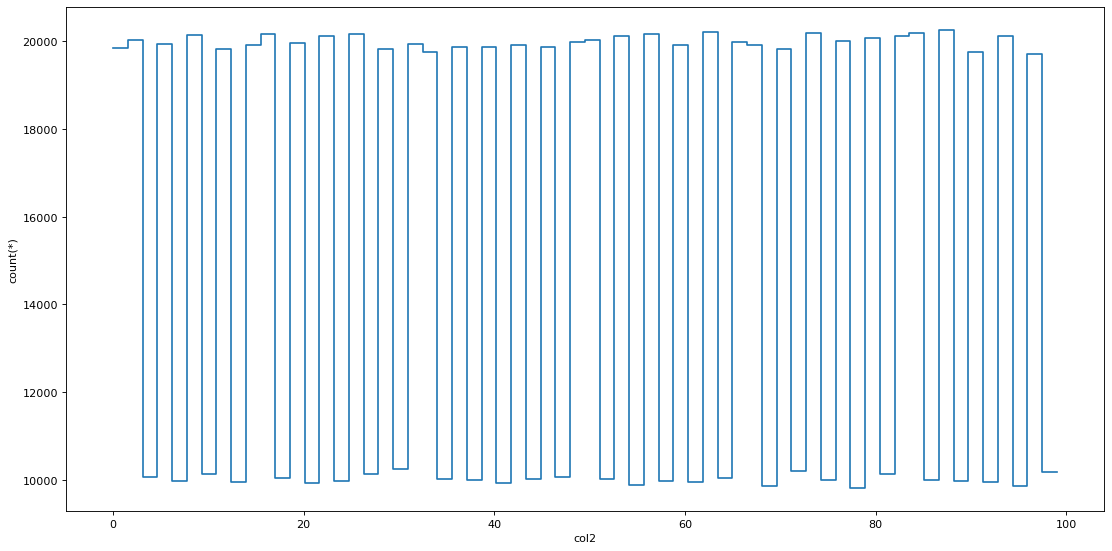

In [11]:
dv.viz.histogram(dv.col2, figsize=(14, 7))

In [12]:
dv['col1_plus_col2'] = dv.col1 + dv.col2
dv['col1_plus_col2']

Expression = col1_plus_col2
Length: 1,000,000 dtype: int64 (column)
---------------------------------------
     0   84
     1   75
     2   72
     3   94
     4   35
    ...    
999995  115
999996  177
999997  152
999998  118
999999   84

In [13]:
dvv = dv[dv.col1 > 90]
dvv.head()

#,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,...,col901,col902,col903,col904,col905,col906,col907,col908,col909,col910,col911,col912,col913,col914,col915,col916,col917,col918,col919,col920,col921,col922,col923,col924,col925,col926,col927,col928,col929,col930,col931,col932,col933,col934,col935,col936,col937,col938,col939,col940,col941,col942,col943,col944,col945,col946,col947,col948,col949,col950,col951,col952,col953,col954,col955,col956,col957,col958,col959,col960,col961,col962,col963,col964,col965,col966,col967,col968,col969,col970,col971,col972,col973,col974,col975,col976,col977,col978,col979,col980,col981,col982,col983,col984,col985,col986,col987,col988,col989,col990,col991,col992,col993,col994,col995,col996,col997,col998,col999,col1_plus_col2
0,10,98,24,31,78,96,52,74,23,49,87,16,58,29,18,98,64,84,27,78,68,18,65,81,94,12,60,94,47,93,32,25,61,37,85,34,7,83,67,11,17,29,7,91,77,35,33,79,84,8,73,18,92,17,65,54,57,62,99,3,79,92,55,16,81,0,5,39,45,10,42,46,31,39,55,10,46,3,16,6,12,74,92,69,78,99,93,28,58,58,20,55,28,81,8,30,54,1,18,43,...,40,27,77,94,34,93,17,11,27,68,4,88,30,42,32,23,93,19,98,51,57,53,96,46,98,52,81,60,99,58,82,84,47,87,92,76,66,52,70,72,11,50,57,98,41,29,90,12,55,99,50,75,94,19,74,73,46,52,56,79,94,34,97,11,8,54,43,40,12,50,42,74,40,22,93,64,71,18,14,20,10,95,37,52,43,15,72,97,71,29,15,3,90,46,67,38,4,63,29,122
1,71,98,37,13,7,61,1,1,83,70,67,88,18,78,94,79,77,43,49,67,26,18,35,11,70,21,34,56,20,77,78,4,44,84,71,81,1,18,98,9,31,1,46,32,49,34,59,12,94,31,82,43,16,71,0,18,44,43,9,84,77,14,24,22,57,74,89,12,0,13,89,43,80,26,99,17,66,23,75,48,50,96,61,74,89,77,73,68,97,38,90,0,28,50,18,9,32,95,18,11,...,85,31,85,94,31,88,1,34,60,9,31,35,57,33,15,69,47,40,68,82,71,77,97,55,51,82,24,32,7,94,72,73,50,67,68,53,87,67,40,46,72,5,92,45,29,74,66,52,85,22,49,54,17,77,59,44,16,90,59,80,62,8,78,26,41,64,83,9,91,85,44,18,90,25,97,84,53,78,89,60,54,71,48,40,33,66,28,99,52,67,95,4,86,76,23,1,23,44,11,135
2,14,93,31,23,30,96,45,70,85,79,35,54,18,31,48,3,2,43,96,80,79,53,36,90,79,23,82,96,44,10,57,96,52,59,28,77,83,77,34,6,66,35,19,17,50,35,40,23,82,1,22,97,54,94,91,17,53,86,79,65,3,98,91,62,98,54,34,3,33,58,96,27,86,60,60,84,85,87,52,27,27,79,13,98,16,29,15,66,17,10,86,77,57,71,70,45,56,56,42,5,...,56,50,76,83,81,91,88,65,20,25,4,50,19,26,16,18,67,13,17,3,24,89,65,32,57,5,36,71,1,96,24,49,45,24,27,94,78,40,65,92,53,68,23,95,9,49,95,12,8,73,47,48,47,78,78,37,22,86,22,24,96,58,52,56,44,78,58,96,55,8,7,43,52,56,10,72,74,4,87,10,44,83,2,42,59,43,18,87,99,42,31,81,86,30,32,47,76,39,91,124
3,19,92,88,57,63,82,10,36,5,81,21,12,53,43,95,78,91,74,49,47,7,96,8,4,96,16,89,0,38,12,98,96,63,18,14,37,89,99,84,45,49,24,47,15,75,0,8,48,88,72,23,37,42,3,65,59,14,8,69,59,2,21,2,66,43,98,82,50,42,95,37,54,72,39,26,75,31,26,82,42,35,46,3,10,85,63,50,10,38,8,9,97,65,58,93,28,98,18,92,45,...,80,86,9,65,95,11,66,43,52,64,80,75,46,90,74,33,10,85,83,38,20,57,73,78,85,68,79,52,30,89,67,44,26,3,71,40,24,41,47,32,93,47,34,65,66,65,16,12,59,32,1,95,33,92,77,61,18,91,49,11,14,50,59,43,67,63,49,41,82,87,87,80,32,9,35,29,8,24,69,47,64,46,0,63,22,0,79,9,74,0,90,28,15,35,77,94,4,71,81,180
4,56,95,73,90,1,70,99,94,62,19,84,9,0,43,41,99,32,29,82,1,21,76,45,3,99,76,60,13,79,38,52,51,10,31,35,61,14,67,31,72,96,68,95,18,99,85,6,16,42,67,48,57,95,61,70,19,20,56,75,71,68,56,68,78,73,1,80,51,87,47,10,91,48,20,55,85,44,87,49,27,39,30,64,50,55,40,88,93,69,18,31,0,64,61,18,28,78,93,81,7,...,55,88,11,79,10,4,10,96,43,96,71,35,91,29,69,38

In [14]:
dv['col1_50'] = dv.col1 >= 50
dv['col1_50']

Expression = col1_50
Length: 1,000,000 dtype: bool (column)
--------------------------------------
     0   True
     1  False
     2   True
     3  False
     4  False
     ...     
999995  False
999996   True
999997   True
999998   True
999999  False

In [15]:
dv_group = dv.groupby(dv['col1_50'], agg=vaex.agg.sum(dv['col3']))
dv_group

#,col1_50,col3_sum
0,False,24735061
1,True,24779814


In [16]:
dv_join = dv.join(dv_group, on='col1_50')
dv_join

#,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,...,col903,col904,col905,col906,col907,col908,col909,col910,col911,col912,col913,col914,col915,col916,col917,col918,col919,col920,col921,col922,col923,col924,col925,col926,col927,col928,col929,col930,col931,col932,col933,col934,col935,col936,col937,col938,col939,col940,col941,col942,col943,col944,col945,col946,col947,col948,col949,col950,col951,col952,col953,col954,col955,col956,col957,col958,col959,col960,col961,col962,col963,col964,col965,col966,col967,col968,col969,col970,col971,col972,col973,col974,col975,col976,col977,col978,col979,col980,col981,col982,col983,col984,col985,col986,col987,col988,col989,col990,col991,col992,col993,col994,col995,col996,col997,col998,col999,col1_plus_col2,col1_50,col3_sum
0,91,58,26,39,32,74,72,24,15,79,15,66,28,54,63,75,10,65,58,13,64,99,6,19,76,1,19,77,1,9,47,17,18,44,67,88,9,48,48,71,38,64,34,7,4,42,53,92,65,55,7,76,86,4,21,81,55,56,12,99,65,71,55,85,55,24,87,26,93,51,9,19,21,29,29,56,16,26,69,2,40,49,56,45,36,29,86,20,38,65,33,78,83,55,78,93,29,3,1,53,...,76,7,93,2,43,2,92,97,89,61,34,59,5,98,8,48,19,21,3,94,64,90,31,18,64,12,76,91,88,82,23,25,88,70,36,27,97,92,84,29,1,59,88,40,13,70,43,14,76,95,82,72,58,58,73,71,92,4,44,41,50,7,54,13,6,57,53,93,6,23,56,67,8,53,74,70,49,74,90,73,79,62,8,90,30,54,20,81,92,73,66,88,42,38,35,46,84,84,True,24779814
1,49,49,26,53,89,14,72,65,58,18,63,97,43,84,5,41,40,14,23,41,9,30,85,62,50,8,81,87,21,12,80,16,91,6,45,24,51,96,57,10,38,59,47,82,98,79,11,49,92,61,48,2,4,75,94,82,38,26,67,67,66,74,58,51,73,34,56,36,27,67,66,62,82,20,93,83,55,62,58,5,59,99,88,60,42,21,97,60,47,5,78,12,8,37,52,34,24,49,73,57,...,30,36,89,94,96,93,3,37,80,71,27,75,28,91,7,44,96,89,52,88,86,82,1,70,40,30,59,48,7,79,83,51,10,67,40,55,50,35,71,95,82,25,94,79,11,82,64,79,79,88,27,18,11,91,49,50,19,15,8,79,35,38,20,35,75,91,38,39,19,32,24,35,16,3,37,24,95,44,50,36,56,52,80,59,27,94,70,64,67,9,22,11,92,43,40,15,69,75,False,24735061
2,68,67,5,73,93,56,95,10,72,65,99,33,78,60,87,90,31,85,11,34,61,62,40,56,30,87,91,64,39,74,75,60,12,38,22,98,1,22,87,6,1,49,28,9,82,54,93,18,2,57,87,33,82,96,99,0,13,37,98,94,76,9,59,81,75,66,52,50,10,71,5,33,66,92,49,65,2,62,24,75,57,17,39,34,13,44,80,84,29,77,45,93,2,97,25,78,73,83,39,22,...,62,86,78,39,7,25,47,95,32,35,54,48,71,29,19,22,4,50,85,75,15,47,55,97,93,80,18,60,89,74,88,74,37,40,29,52,4,81,19,91,66,61,12,19,8,73,45,36,42,0,62,81,30,13,21,9,1,83,43,5,23,27,51,48,7,90,65,77,93,3,41,40,53,14,30,78,98,43,30,63,57,14,23,20,93,97,81,2,56,68,7,35,44,37,85,35,13,72,True,24779814
3,33,22,72,78,20,99,85,82,53,40,75,93,1,23,86,21,59,8,69,50,71,8,97,93,3,82,50,67,26,38,30,56,41,18,3,27,35,36,19,67,34,72,50,81,51,12,33,27,33,77,1,70,0,51,86,37,52,38,0,49,28,4,71,50,89,98,85,60,86,3,81,68,61,57,41,71,36,16,2,52,68,53,14,0,11,28,11,4,81,26,64,54,74,13,20,13,30,75,2,53,...,45,67,95,32,71,0,71,66,32,66,76,17,40,90,43,50,10,85,65,1,39,84,62,40,78,28,96,96,68,41,72,4,78,95,62,92,44,98,42,12,42,87,64,18,40,32,33,59,28,85,49,50,71,6,48,74,94,47,72,27,9,34,78,34,21,29,23,96,97,18,33,31,39,12,61,50,72,33,40,94,85,32,18,1,95,25,27,88,40,50,77,6,1,95,72,90,50,94,False,24735061
4,97,30,5,3,19,71,82,9,63,64,42,30,49,23,51,60,6,92,24,57,5,91,22,39,95,78,6,80,72,53,34,83,24,24,78,56,61,36,5,72,19,10,26,15,27,14,51,60,23,13,33,77,47,61,66,27,30,14,93,24,75,54,76,96,88,0,14,41,59,90,39,96,56,48,29,23,50,66,71,45,62,78,72,7,74,18,83,73,6,76,77,65,61,55,99,72,16,44,71,26,...,58,68,99,78,48,23,10,78,62